In [44]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "./"
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [45]:
# Generate some fake data with linear function
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [46]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance, include bias theta0 into theta

In [47]:
# prepare data for plot the model's predciton on training data set
X_new = X
X_new_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

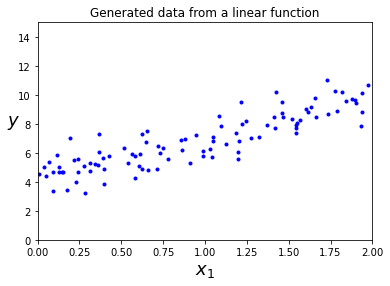

In [48]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title('Generated data from a linear function')
plt.show()

### Linear regression using batch gradient descent

In [49]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # two random numbers theta0 and theta1

 # update the theta for each of 1000 steps with new local gradient.
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [50]:
theta

array([[4.21509616],
       [2.77011339]])

### Batch gradient descent with different learning rate

In [51]:
theta_path_bgd = []
def plot_gradient_descent(eta, X, y, theta_path=None):
    # random initialization
    theta = np.random.randn(2,1)
    
    # add x0 = 1 to each instance, include bias theta0 into theta
    X_b = np.c_[np.ones((100, 1)), X]  
    # prepare data for plot the model's predciton on training data set
    X_new_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    
    m = len(X_b)
    plt.plot(X, y, "bo")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "r." if iteration > 0 else "r-"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, -10, 25])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

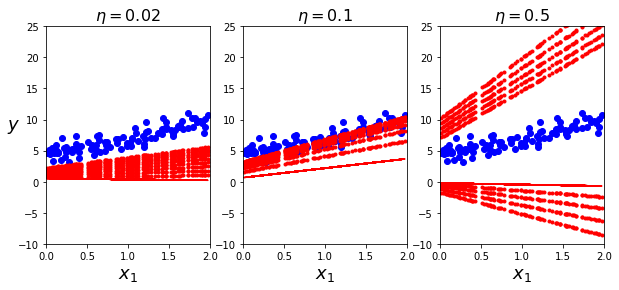

In [52]:
np.random.seed(42)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(eta=0.02, X=X, y=y)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(eta=0.1, X=X, y=y, theta_path=theta_path_bgd) # converged learning rate
plt.subplot(133); plot_gradient_descent(eta=0.5, X=X, y=y)

### Stochastic Gradient Descent

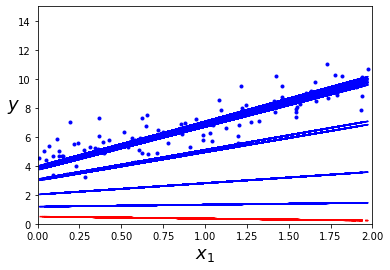

In [53]:
def learning_schedule(t):
    t0, t1 = 5, 50  # learning schedule hyperparameters
    return t0 / (t + t1)

m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
theta_path_sgd = []

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
for epoch in range(50):
    for i in range(m):
        if epoch == 0 and i < 15:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) # decrease the learning rate for each epoch and iterated data points
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

In [54]:
theta

array([[4.21076011],
       [2.74856079]])

#### Use sklearn

In [55]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [56]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

### Mini-batch gradient descent

In [57]:
minibatch_size = 20
theta_path_mgd = []
t = 0

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

def learning_schedule(t):
    t0, t1 = 200, 1000
    return t0 / (t + t1)

for epoch in range(50):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [58]:
theta

array([[4.25214635],
       [2.7896408 ]])

Saving figure gradient_descent_paths_plot


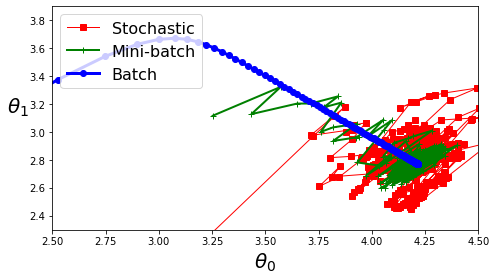

In [59]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()